In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re 
import glob
from collections import Counter

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

### häufigste Wortfrequenz nach Modalwert

In [19]:
def tokenize(lines, pattern=re.compile(r'\p{L}+')):
    """

    :param lines: object to be tokenized, e.g. file
    :param pattern: pattern to tokenize 'lines'
    :return: lowered and tokenized string
    """
    for line in lines:
        yield from map(str.lower, pattern.findall(line))

# def remove_stopwords(tokens):
#     return (token for token in tokenize(tokens) if token not in set(stopwords.words('german')))


def wordcounts_in_file(file):
    """

    :param file: filename of file to be analyzed
    :return: Counter of tokenized file
    """
    with open(file, encoding='utf-8') as f:
        # return Counter(remove_stopwords(f))
        return Counter(tokenize(f))


def word2freq(counts):
    """

    :param counts: a Counter from a file to be analyzed
    :return: list of each words and their frequencies
    """
    words = []
    freq = []
    for c in counts:
        words.append(c)
        freq.append(counts[c])
    return words, freq


def create_pd_series():
    """

    :param path: path to files
    :param prefix: prefix to remove from filename for further use in Series
    :return: list of pd.Series with words and wordcounts per file
    """
    freq_list = []
    for file in glob.glob(path):
        filename = file.replace(prefix, '')
        counts = wordcounts_in_file(file)
        words, freq = word2freq(counts)
        freq_list.append(pd.Series(freq, words, name=filename))
        print(filename)  # später löschen
    return freq_list


def create_dataframe(series):
    """

    :param series: list of pd.Series, created e.g. with create_pd_series()
    :param mfw: value of most frequent words
    :return: document-term-matrix as pd.Dataframe with zscores
    """
    df = pd.DataFrame(series)
    df = df.fillna(0)

#     df = df.div(df.sum(axis=1), axis=0)

    df.loc['Total_per_word'] = df.sum()
    df = df.sort_values(by='Total_per_word', axis=1, ascending=False)
#     df.drop('Total_per_word', axis=0, inplace=True)
    return df

In [20]:
path = "../corpus/alles/*.txt"
prefix = "../corpus/alles/"
freqs = create_pd_series()

lyrik_lemma_l00180207.txt.txt
lyrik_lemma_l00180012.txt.txt
lyrik_lemma_l00180021.txt.txt
lyrik_lemma_l00180093.txt.txt
lyrik_lemma_l00180144.txt.txt
lyrik_lemma_l00180114.txt.txt
epik_lemma_fontane.txt
lyrik_lemma_l00180154.txt.txt
lyrik_lemma_l00180187.txt.txt
lyrik_lemma_l00180212.txt.txt
lyrik_lemma_l00180165.txt.txt
lyrik_lemma_l00180015.txt.txt
lyrik_lemma_l00180044.txt.txt
lyrik_lemma_l00180139.txt.txt
lyrik_lemma_l00180166.txt.txt
lyrik_lemma_l00180189.txt.txt
lyrik_lemma_l00180179.txt.txt
lyrik_lemma_l00180196.txt.txt
lyrik_lemma_l00180147.txt.txt
lyrik_lemma_l00180048.txt.txt
lyrik_lemma_l00180214.txt.txt
lyrik_lemma_l00180088.txt.txt
lyrik_lemma_l00180228.txt.txt
lyrik_lemma_l00180060.txt.txt
lyrik_lemma_l00180200.txt.txt
lyrik_lemma_l00180062.txt.txt
lyrik_lemma_l00180070.txt.txt
lyrik_lemma_l00180219.txt.txt
lyrik_lemma_l00180005.txt.txt
lyrik_lemma_l00180131.txt.txt
epik_lemma_schnitzler.txt
lyrik_lemma_l00180030.txt.txt
lyrik_lemma_l00180069.txt.txt
lyrik_lemma_l00180055

In [21]:
fre = create_dataframe(freqs)
fre

,die,und,sein,ich,eine,er,sie,in,zu,haben,...,buchstab,weichet,aufstrebt,wohlgekühlte,hochzeitsspeisen,erdenherrn,harf,urgeschlecht,peine,weckest
lyrik_lemma_l00180207.txt.txt,10.0,1.0,2.0,4.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180012.txt.txt,13.0,1.0,4.0,11.0,1.0,1.0,0.0,4.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180021.txt.txt,21.0,6.0,1.0,4.0,7.0,0.0,1.0,8.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180093.txt.txt,54.0,14.0,9.0,5.0,7.0,2.0,2.0,16.0,6.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180144.txt.txt,6.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lyrik_lemma_l00180138.txt.txt,19.0,5.0,5.0,6.0,2.0,0.0,4.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180190.txt.txt,64.0,18.0,13.0,13.0,15.0,8.0,4.0,14.0,3.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180126.txt.txt,10.0,16.0,2.0,1.0,0.0,0.0,2.0,4.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180102.txt.txt,26.0,8.0,0.0,7.0,0.0,0.0,0.0,2.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### most frequent words with and without stopwords by relative frequencies

In [51]:
epik = fre.copy()
epik = epik[epik.index.str.contains('epik')]
epik.loc['Summen'] = (epik.sum(axis=0))
epik['Total_per_text'] = epik.sum(axis=1)
epik = epik.sort_values(by='Summen', axis=1, ascending=False)
epik

,Total_per_text,die,und,sein,ich,er,eine,sie,in,zu,...,ergrünt,lenzgeschichten,leire,lenzmusik,vernehm,hammelheerde,grasgrün,coquett,winternegligee,weltenrunds
epik_lemma_fontane.txt,33198.0,2831.0,1491.0,1077.0,301.0,683.0,628.0,408.0,458.0,434.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_schnitzler.txt,33655.0,3056.0,1030.0,1137.0,843.0,975.0,698.0,843.0,606.0,472.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_achleitner.txt,46802.0,5841.0,1340.0,992.0,642.0,465.0,996.0,406.0,1011.0,883.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_may.txt,149410.0,12353.0,4536.0,4996.0,5799.0,3075.0,3288.0,1955.0,1953.0,2243.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_hoffmann.txt,29707.0,3391.0,1136.0,651.0,508.0,704.0,476.0,439.0,716.0,377.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_kafka.txt,19509.0,2023.0,624.0,600.0,102.0,616.0,311.0,321.0,362.0,428.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_brentano.txt,56151.0,6713.0,1910.0,1012.0,1302.0,1138.0,680.0,911.0,1147.0,965.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_lewald.txt,34373.0,2788.0,1131.0,1039.0,1213.0,588.0,638.0,1000.0,586.0,621.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_sapper.txt,25523.0,2756.0,737.0,813.0,300.0,432.0,470.0,571.0,541.0,304.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_bonsels.txt,37198.0,3403.0,1336.0,1149.0,654.0,454.0,774.0,1528.0,625.0,491.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
komplett = epik['Total_per_text']['Summen']
epik.drop('Total_per_text', axis=1, inplace=True)
epik = epik.T
epik['rel_sum'] = epik['Summen']/komplett
epik = epik.sort_values(by=['rel_sum'], ascending=False)
#huber = huber[:20]   # uncomment for vis
epik.T

,die,und,sein,ich,er,eine,sie,in,zu,haben,...,wonnevollem,schwellst,athmest,gewitterluft,send,verwirbelt,judaslohn,lebensstark,brandpfahl,weltenrunds
epik_lemma_fontane.txt,2831.00000,1491.000000,1077.000000,301.000000,683.000000,628.000000,408.000000,458.00000,434.000000,495.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_schnitzler.txt,3056.00000,1030.000000,1137.000000,843.000000,975.000000,698.000000,843.000000,606.00000,472.000000,486.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_achleitner.txt,5841.00000,1340.000000,992.000000,642.000000,465.000000,996.000000,406.000000,1011.00000,883.000000,487.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_may.txt,12353.00000,4536.000000,4996.000000,5799.000000,3075.000000,3288.000000,1955.000000,1953.00000,2243.000000,2329.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_hoffmann.txt,3391.00000,1136.000000,651.000000,508.000000,704.000000,476.000000,439.000000,716.00000,377.000000,186.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_kafka.txt,2023.00000,624.000000,600.000000,102.000000,616.000000,311.000000,321.000000,362.00000,428.000000,298.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_brentano.txt,6713.00000,1910.000000,1012.000000,1302.000000,1138.000000,680.000000,911.000000,1147.00000,965.000000,304.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_lewald.txt,2788.00000,1131.000000,1039.000000,1213.000000,588.000000,638.000000,1000.000000,586.00000,621.000000,522.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_sapper.txt,2756.00000,737.000000,813.000000,300.000000,432.000000,470.000000,571.000000,541.00000,304.000000,387.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_bonsels.txt,3403.00000,1336.000000,1149.000000,654.000000,454.000000,774.000000,1528.000000,625.00000,491.000000,498.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
with open('de_stopwords.txt','r') as f_open:
    stopwords = f_open.read()
#     if x in set(stopwords.words('german')):
ohne_stop_epik = epik.copy().T
for x in ohne_stop_epik:
    if x in stopwords:
        ohne_stop_epik.drop(x, axis=1, inplace=True)
ohne_stop_epik

,stehen,hand,auge,bleiben,kind,rufen,fragen,liegen,halten,finden,...,wonnevollem,schwellst,athmest,gewitterluft,send,verwirbelt,judaslohn,lebensstark,brandpfahl,weltenrunds
epik_lemma_fontane.txt,79.00000,51.000000,21.000000,39.000000,15.000000,18.000000,20.000000,46.000000,38.000000,25.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_schnitzler.txt,104.00000,77.000000,61.000000,53.000000,31.000000,45.000000,46.000000,51.000000,40.000000,28.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_achleitner.txt,67.00000,37.000000,33.000000,74.000000,52.000000,48.000000,57.000000,34.000000,42.000000,54.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_may.txt,230.00000,235.000000,132.000000,181.000000,48.000000,96.000000,314.000000,195.000000,210.000000,155.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_hoffmann.txt,53.00000,39.000000,50.000000,19.000000,8.000000,67.000000,12.000000,19.000000,34.000000,16.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_kafka.txt,25.00000,38.000000,19.000000,35.000000,3.000000,24.000000,10.000000,29.000000,28.000000,10.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_brentano.txt,154.00000,61.000000,56.000000,55.000000,62.000000,33.000000,21.000000,38.000000,27.000000,57.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_lewald.txt,32.00000,33.000000,42.000000,55.000000,56.000000,11.000000,28.000000,39.000000,50.000000,85.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_sapper.txt,76.00000,50.000000,8.000000,42.000000,79.000000,50.000000,29.000000,19.000000,30.000000,23.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epik_lemma_bonsels.txt,28.00000,32.000000,66.000000,33.000000,7.000000,90.000000,87.000000,38.000000,49.000000,45.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
ohne_stop_epik = ohne_stop_epik.T
ohne_stop_epik = ohne_stop_epik.sort_values(by=['rel_sum'],ascending=False)
ohne_stop_epik = ohne_stop_epik[:20]
ohne_stop_epik.T

,stehen,hand,auge,bleiben,kind,rufen,fragen,liegen,halten,finden,denken,alt,schön,arm,herz,scheinen,card,vater,glauben,treten
epik_lemma_fontane.txt,79.00000,51.000000,21.000000,39.000000,15.000000,18.000000,20.000000,46.000000,38.000000,25.000000,43.000000,61.000000,8.000000,19.000000,13.000000,13.000000,9.00000,6.000000,14.000000,28.000000
epik_lemma_schnitzler.txt,104.00000,77.000000,61.000000,53.000000,31.000000,45.000000,46.000000,51.000000,40.000000,28.000000,62.000000,41.000000,37.000000,35.000000,6.000000,53.000000,12.00000,13.000000,52.000000,24.000000
epik_lemma_achleitner.txt,67.00000,37.000000,33.000000,74.000000,52.000000,48.000000,57.000000,34.000000,42.000000,54.000000,25.000000,74.000000,29.000000,30.000000,10.000000,12.000000,91.00000,64.000000,36.000000,32.000000
epik_lemma_may.txt,230.00000,235.000000,132.000000,181.000000,48.000000,96.000000,314.000000,195.000000,210.000000,155.000000,86.000000,71.000000,46.000000,70.000000,48.000000,73.000000,455.00000,91.000000,110.000000,139.000000
epik_lemma_hoffmann.txt,53.00000,39.000000,50.000000,19.000000,8.000000,67.000000,12.000000,19.000000,34.000000,16.000000,29.000000,28.000000,31.000000,23.000000,9.000000,26.000000,2.00000,18.000000,26.000000,36.000000
epik_lemma_kafka.txt,25.00000,38.000000,19.000000,35.000000,3.000000,24.000000,10.000000,29.000000,28.000000,10.000000,32.000000,15.000000,8.000000,13.000000,2.000000,22.000000,0.00000,104.000000,11.000000,9.000000
epik_lemma_brentano.txt,154.00000,61.000000,56.000000,55.000000,62.000000,33.000000,21.000000,38.000000,27.000000,57.000000,32.000000,25.000000,40.000000,84.000000,136.000000,26.000000,1.00000,51.000000,18.000000,48.000000
epik_lemma_lewald.txt,32.00000,33.000000,42.000000,55.000000,56.000000,11.000000,28.000000,39.000000,50.000000,85.000000,67.000000,52.000000,54.000000,30.000000,105.000000,58.000000,0.00000,16.000000,56.000000,16.000000
epik_lemma_sapper.txt,76.00000,50.000000,8.000000,42.000000,79.000000,50.000000,29.000000,19.000000,30.000000,23.000000,29.000000,18.000000,17.000000,14.000000,22.000000,7.000000,25.00000,71.000000,16.000000,22.000000
epik_lemma_bonsels.txt,28.00000,32.000000,66.000000,33.000000,7.000000,90.000000,87.000000,38.000000,49.000000,45.000000,102.000000,21.000000,47.000000,29.000000,55.000000,45.000000,17.00000,0.000000,40.000000,21.000000


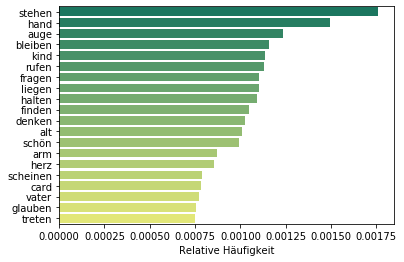

In [98]:
ohne_stop_epik = ohne_stop_epik.T
ax = sns.barplot(x=ohne_stop_epik['rel_sum'], y=ohne_stop_epik.index, data=ohne_stop_epik, palette='summer')
ax.set(xlabel='Relative Häufigkeit')
plt.savefig('../results/dataexploration/MFW_epik_ohne_stop')

In [99]:
lyrik = fre.copy()
lyrik = lyrik[lyrik.index.str.contains('lyrik')]
lyrik.loc['Summen'] = (lyrik.sum(axis=0))
lyrik['Total_per_text'] = lyrik.sum(axis=1)
lyrik = lyrik.sort_values(by='Summen', axis=1, ascending=False)
lyrik

,Total_per_text,die,und,ich,in,sein,du,eine,es,zu,...,dieser,fortbewegung,scheidung,kommissionsmitglied,bestehn,überdeckt,ärgste,pusten,durchstoßen,wurzelmännleins
lyrik_lemma_l00180207.txt.txt,108.0,10.0,1.0,4.0,1.0,2.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180012.txt.txt,113.0,13.0,1.0,11.0,4.0,4.0,0.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180021.txt.txt,145.0,21.0,6.0,4.0,8.0,1.0,0.0,7.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180093.txt.txt,470.0,54.0,14.0,5.0,16.0,9.0,1.0,7.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180144.txt.txt,43.0,6.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lyrik_lemma_l00180138.txt.txt,159.0,19.0,5.0,6.0,2.0,5.0,2.0,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180190.txt.txt,472.0,64.0,18.0,13.0,14.0,13.0,3.0,15.0,7.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180126.txt.txt,152.0,10.0,16.0,1.0,4.0,2.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180102.txt.txt,170.0,26.0,8.0,7.0,2.0,0.0,6.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
komplett = lyrik['Total_per_text']['Summen']
lyrik.drop('Total_per_text', axis=1, inplace=True)
lyrik = lyrik.T
lyrik['rel_sum'] = lyrik['Summen']/komplett
lyrik = lyrik.sort_values(by=['rel_sum'], ascending=False)
lyrik.T

,die,und,ich,in,sein,du,eine,es,zu,mein,...,nomine,sigillo,principis,schnarche,kreieret,entstreben,douceur,orgeln,exercitia,wurzelmännleins
lyrik_lemma_l00180207.txt.txt,10.000000,1.000000,4.000000,1.000000,2.000000,2.00000,1.000000,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180012.txt.txt,13.000000,1.000000,11.000000,4.000000,4.000000,0.00000,1.000000,1.000000,3.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180021.txt.txt,21.000000,6.000000,4.000000,8.000000,1.000000,0.00000,7.000000,0.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180093.txt.txt,54.000000,14.000000,5.000000,16.000000,9.000000,1.00000,7.000000,6.000000,6.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180144.txt.txt,6.000000,2.000000,1.000000,0.000000,0.000000,0.00000,2.000000,1.000000,2.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lyrik_lemma_l00180190.txt.txt,64.000000,18.000000,13.000000,14.000000,13.000000,3.00000,15.000000,7.000000,3.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180126.txt.txt,10.000000,16.000000,1.000000,4.000000,2.000000,5.00000,0.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180102.txt.txt,26.000000,8.000000,7.000000,2.000000,0.000000,6.00000,0.000000,0.000000,4.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Summen,6315.000000,2091.000000,1865.000000,1320.000000,1043.000000,950.00000,745.000000,609.000000,601.000000,557.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
with open('de_stopwords.txt','r') as f_open:
    stopwords = f_open.read()
#     if x in set(stopwords.words('german')):
ohne_stop_lyrik = lyrik.copy().T
for x in ohne_stop_lyrik:
    if x in stopwords:
        ohne_stop_lyrik.drop(x, axis=1, inplace=True)
ohne_stop_lyrik

,herz,seele,nacht,auge,licht,ewig,tief,süß,liegen,himmel,...,nomine,sigillo,principis,schnarche,kreieret,entstreben,douceur,orgeln,exercitia,wurzelmännleins
lyrik_lemma_l00180207.txt.txt,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180012.txt.txt,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180021.txt.txt,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180093.txt.txt,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180144.txt.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lyrik_lemma_l00180190.txt.txt,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180126.txt.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180102.txt.txt,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Summen,244.000000,183.000000,139.000000,136.000000,119.000000,92.000000,90.000000,86.000000,86.000000,84.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
ohne_stop_lyrik = ohne_stop_lyrik.T
ohne_stop_lyrik = ohne_stop_lyrik.sort_values(by=['rel_sum'], ascending=False)
ohne_stop_lyrik = ohne_stop_lyrik[:20]

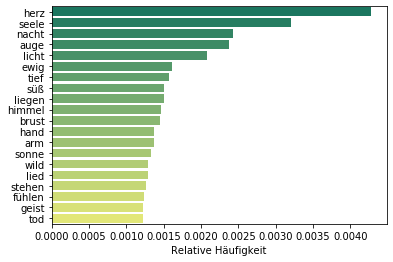

In [105]:
ax = sns.barplot(x=ohne_stop_lyrik['rel_sum'], y=ohne_stop_lyrik.index, data=ohne_stop_lyrik, palette='summer')
ax.set(xlabel='Relative Häufigkeit')
plt.savefig('../results/dataexploration/MFW_lyrik_ohne_stop')

[Text(0.5, 0, 'Textlängen')]

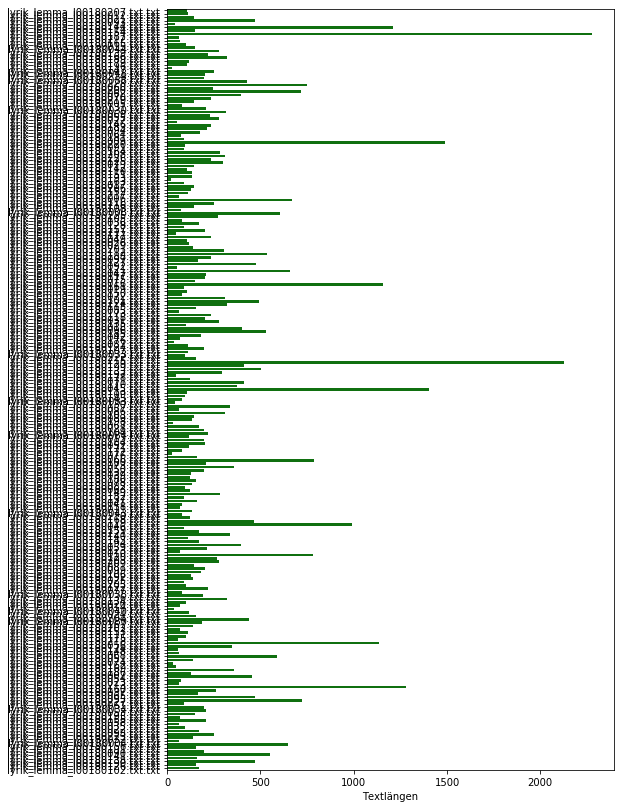

In [116]:
lyrik = fre.copy()
lyrik = lyrik[lyrik.index.str.contains('lyrik')]
lyrik['Total_per_text'] = lyrik.sum(axis=1)

plt.figure(figsize=(8,14))
ax = sns.barplot(x=lyrik.Total_per_text, y=lyrik.index, data=lyrik, color='g')
ax.set(xlabel='Textlängen')
# plt.savefig('textlängen')

[Text(0.5, 0, 'Textlängen')]

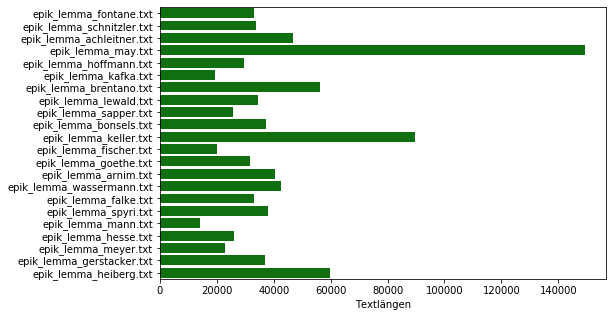

In [120]:
epik = fre.copy()
epik = epik[epik.index.str.contains('epik')]
epik['Total_per_text'] = epik.sum(axis=1)

plt.figure(figsize=(8,5))
ax = sns.barplot(x=epik.Total_per_text, y=epik.index, data=epik, color='g')
ax.set(xlabel='Textlängen')
# plt.savefig('textlängen')

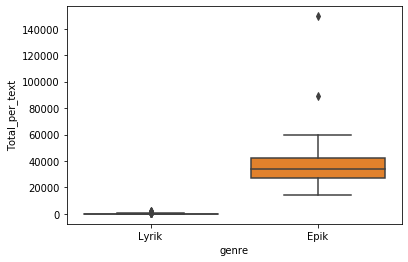

In [127]:
lyrik['genre'] = 'Lyrik'
epik['genre'] = 'Epik'
alle = pd.concat([lyrik, epik])
sns.boxplot(x=alle.genre, y=alle.Total_per_text)
plt.savefig('../results/dataexploration/boxplot_textlaenge')

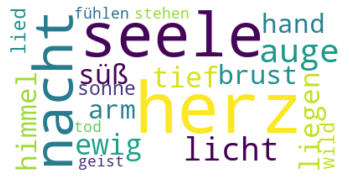

In [129]:
from wordcloud import WordCloud

def makeImage(text, figname):
    wc = WordCloud(background_color="white", max_words=1000)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(figname)
    plt.show()

text = ohne_stop_lyrik['rel_sum']
# text = abba.any()
makeImage(text, "../results/dataexploration/wordcloud_lyrik")

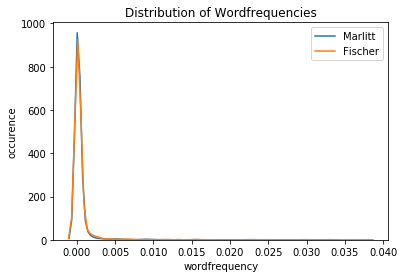

In [90]:
ax = sns.distplot(m['rel_sum'], hist=False, label="Marlitt")
ax = sns.distplot(f['rel_sum'], hist=False, label="Fischer")
ax.set_xlabel("wordfrequency")
ax.set_ylabel("occurence")
plt.title("Distribution of Wordfrequencies")
plt.savefig("distribution_wordfrequencies")
plt.legend()

### compare delta values for texts by same and different authors

In [155]:
def same_dif(delta):
    ax = sns.distplot(delta['cosine'][delta['label']=='different'], hist=False, label='different', color=(0.2, 0.3, 0.1))
    ax = sns.distplot(delta['cosine'][delta['label']=='same'], hist=False, label='same', color='g')
    ax.set(ylabel='Count')

    # Get the two lines from the axes to generate shading
    l1 = ax.lines[0]
    l2 = ax.lines[1]

    # Get the xy data from the lines so that we can shade
    x1, y1 = l1.get_xydata().T
    x2, y2 = l2.get_xydata().T

    xmin = max(x1.min(), x2.min())
    xmax = min(x1.max(), x2.max())
    x = np.linspace(xmin, xmax, 100)
    y1 = np.interp(x, x1, y1)
    y2 = np.interp(x, x2, y2)
    y = np.minimum(y1, y2)
    ax.fill_between(x, y, color="grey", alpha = 0.3, hatch = '|')
    
    # uncomment to add cutoff border
#     cut = cutoff[cutoff['corpus']==corpus]['delta']
#     plt.axvline(float(cut), 0, 1) 
#     plt.savefig(mfw + '_' + corpus + '_' + 'same_different_cutoff')

    
    plt.savefig(mfw + '_' + corpus + '_' + 'same_different_deltas')
    plt.legend()
    plt.show()

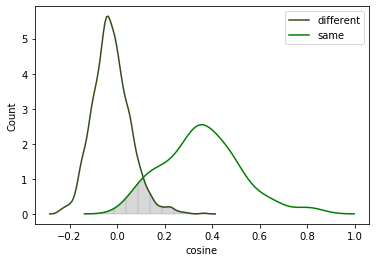

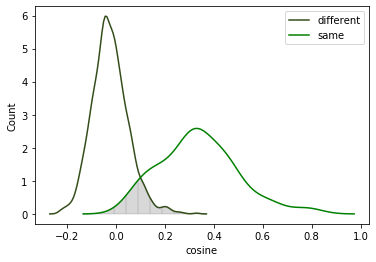

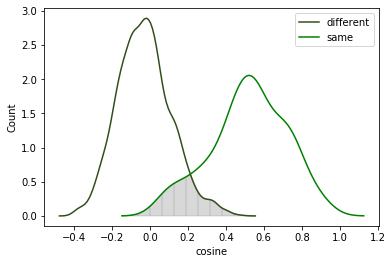

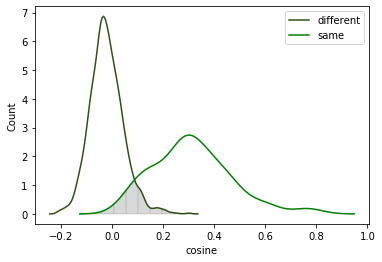

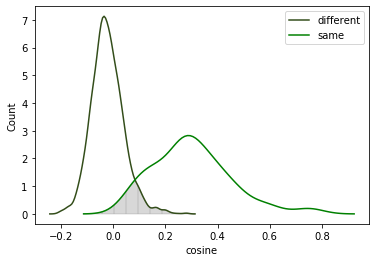

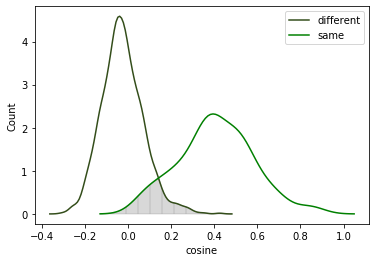

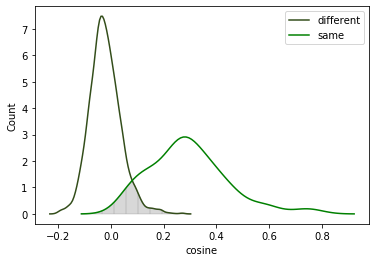

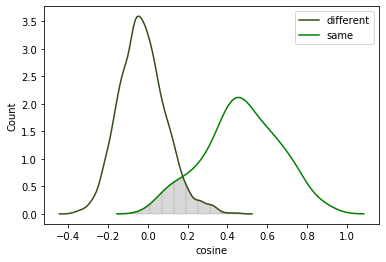

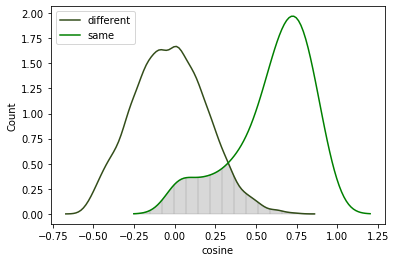

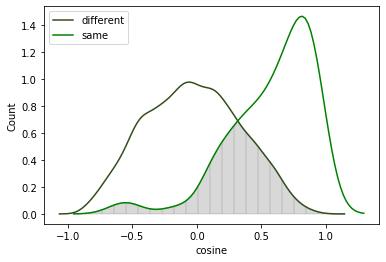

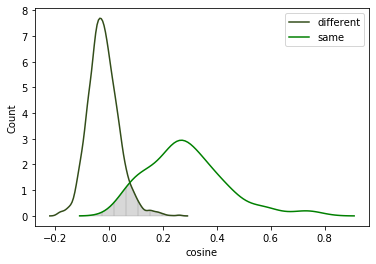

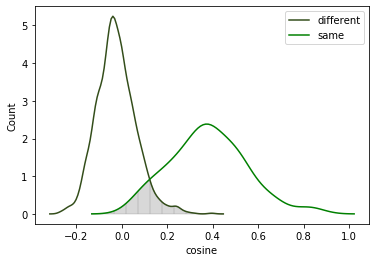

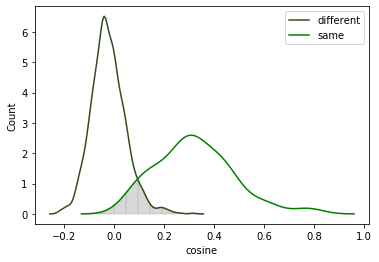

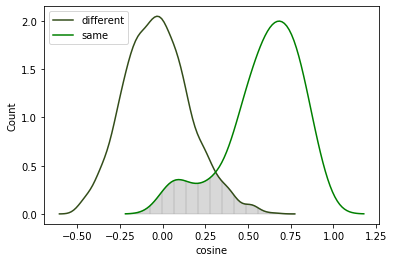

In [156]:
path = "project_stylometry_statistics/results/Chinese/delta/*.h5"
prefix = "project_stylometry_statistics/results/Chinese/delta/"
for file in glob.glob(path):
    delta = pd.read_hdf(file)
    delta = delta[delta.cosine!=1.00]
    mfw = file.replace(prefix, "").split('_')[0]
    corpus = file.replace(prefix, "").replace('.h5','').split('_')[2]
    same_dif(delta)
#     if mfw == '1000':
#         same_dif(delta)


In [ ]:
path = "project_stylometry_statistics/results/Chinese/delta/*.h5"
prefix = "project_stylometry_statistics/results/Chinese/delta/"
for file in glob.glob(path):
    delta = pd.read_hdf(file)
    delta = delta[delta.cosine!=1.00]
    mfw = file.replace(prefix, "").split('_')[0]
    corpus = file.replace(prefix, "").replace('.h5','').split('_')[2]
    same_dif(delta)
#     if mfw == '1000':
#         same_dif(delta)


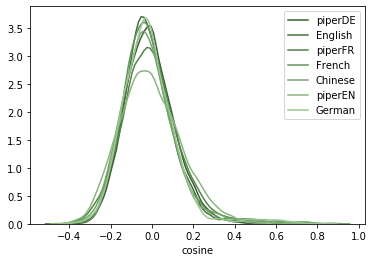

In [63]:
path = 'results/1000/*.h5'
prefix = 'results/1000'
for file in glob.glob(path):
    language = pd.read_hdf(file)
    language = language[language.cosine!=1.00]
    corp = file.replace('.h5', '').split('_')[2]
    sns.set_palette(sns.cubehelix_palette(7, start=1.85, rot=0, dark=0.3, light=.7, reverse=True))
    ax = sns.distplot(language['cosine'], hist=False, label=corp)
    plt.legend()
plt.savefig('delta_normaldist_1000mfw')

### Delta variance per corpus

In [86]:
var = pd.read_hdf("project_stylometry_statistics/results/Chinese/delta/1000_delta_Chinese.h5")
v = var.copy()
v['corpus'] = 'Chinese'
v = v.drop('manhattan', axis=1)
v = v.drop('euclidean', axis=1)
v = v.drop('label', axis=1)
v = v.drop('author', axis=1)
v = v.reset_index()
v = v.drop('index', axis=1)
v

,manhattan,cosine,euclidean,label,author
"BiShuMin,HuaGuanBingDu,seg.txt",0.00,0.00,0.00,same,BiShuMin
"BiShuMin,LanSeTianTang,seg.txt",589.27,0.49,30.22,same,BiShuMin
"YvQiuyv,ShuangLengChangHe,seg.txt",751.50,0.73,36.28,different,YvQiuyv
"LongYingtai,ZheGeDongDangDeShiJie,seg.txt",751.84,0.80,36.84,different,LongYingtai
"YvQiuyv,XingZheWuJiang,seg.txt",758.32,0.76,36.53,different,YvQiuyv
...,...,...,...,...,...
"ZhouRuchang,HongLouShiErCeng,seg.txt",1049.81,1.11,49.20,different,ZhouRuchang
"ZhouGuoping,ShouWangDeJuLi,seg.txt",1050.02,1.13,48.56,different,ZhouGuoping
"ZhouRuchang,HongLouBieYangHong,seg.txt",1057.65,1.10,48.87,different,ZhouRuchang
"ZhouGuoping,LingHunZhiNengDuXing,seg.txt",1066.59,1.13,48.77,different,ZhouGuoping


In [58]:
#variance = pd.DataFrame()
variance = pd.concat([variance, v])
variance = variance[variance['cosine']!=0.00]
variance

,cosine,corpus
1,0.60,piperDE
2,0.75,piperDE
3,0.71,piperDE
4,0.75,piperDE
5,0.78,piperDE
...,...,...
5620,1.11,Chinese
5621,1.13,Chinese
5622,1.10,Chinese
5623,1.13,Chinese


In [9]:
import pandas as pd 
vdelta = pd.read_csv("delta_varianz_allekorpora")
vdelta = vdelta[vdelta.cosine!=1.00]
vdelta.sort_values(by=['corpus'], inplace=True)
vdelta

,Unnamed: 0,cosine,corpus
1,"BiShuMin,LanSeTianTang,seg.txt",0.51,Chinese
3755,"YanGelin,LvXie,seg.txt",0.09,Chinese
3754,"YanGelin,LuFanYanShi,seg.txt",0.10,Chinese
3753,"JiaPingwa,QinQiang,seg.txt",0.32,Chinese
3752,"ChenZhongshi,ChuXia,seg.txt",0.40,Chinese
...,...,...,...
37703,"Cladel,Leon_OMPDRAILLES_Novel.txt",-0.03,pipierFR
37704,"Zola,Emile_LeventredeParis_Novel.txt",-0.07,pipierFR
37705,"Charriere,IsabelleDe_CalisteOuLettresDeLausann...",0.12,pipierFR
37641,"Dumas,Alexandre_OlympesDesCleves_Novel.txt",-0.01,pipierFR


In [10]:
cutoff = pd.read_csv("entire_best_cutoff.csv")
cutoff.sort_values(by=['corpus'], inplace=True)
cutoff                   

,Unnamed: 0,Unnamed: 0.1,fp,fn,percentage,delta,corpus,mfw
5,15,56,0.005766,0.003964,0.57,0.3382,Chinese,1000
2,6,48,0.002883,0.003964,0.49,0.2243,English,2000
1,10,64,0.004324,0.009730,0.65,0.3385,French,500
4,26,56,0.002883,0.003964,0.57,0.3040,German,1000
6,4,64,0.002416,0.002953,0.65,0.3955,piperDE,500
0,18,67,0.003311,0.005459,0.68,0.3996,piperEN,1000
3,18,68,0.004592,0.005828,0.69,0.4367,piperFR,500


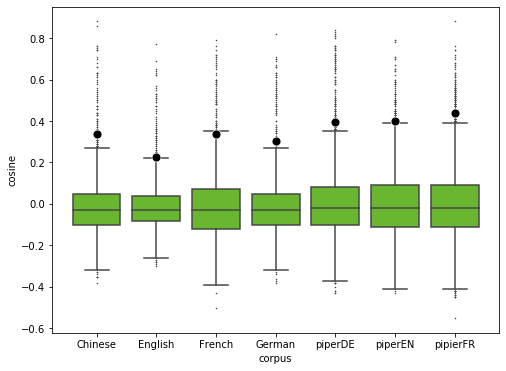

In [14]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='corpus', y='cosine', data=vdelta, color=(0.4, 0.8, 0.1), fliersize=0.5)
ax = sns.scatterplot(x='corpus', y='delta', data=cutoff, color='black', s=80, zorder=10)
plt.ylabel('cosine')
plt.savefig("deltastreuung_plus_deltacutoff")

### Delta normal distribution

In [69]:
cutoff

,Unnamed: 0,Unnamed: 0.1,fp,fn,percentage,delta,corpus,mfw
0,18,67,0.003311,0.005459,0.68,0.3996,piperEN,1000
1,10,64,0.004324,0.009730,0.65,0.3385,French,500
2,6,48,0.002883,0.003964,0.49,0.2243,English,2000
3,18,68,0.004592,0.005828,0.69,0.4367,piperFR,500
4,26,56,0.002883,0.003964,0.57,0.3040,German,1000
5,15,56,0.005766,0.003964,0.57,0.3382,Chinese,1000
6,4,64,0.002416,0.002953,0.65,0.3955,piperDE,500


In [9]:
cos = pd.read_hdf("../results/German/delta/1000_delta_German.h5")
cos = cos[cos.cosine!=1.00]

In [10]:
plus_same = np.mean(cos[cos['label']=='same']['cosine']) + np.std(cos[cos['label']=='same']['cosine'])
minus_same = np.mean(cos[cos['label']=='same']['cosine']) - np.std(cos[cos['label']=='same']['cosine'])

plus_diff = np.mean(cos[cos['label']=='different']['cosine']) + np.std(cos[cos['label']=='different']['cosine'])
minus_diff = np.mean(cos[cos['label']=='different']['cosine']) - np.std(cos[cos['label']=='different']['cosine'])

print(plus_same, minus_same, plus_diff, minus_diff)

0.6191277293757895 0.33281671506865484 0.08468876630119851 -0.13606131532080637


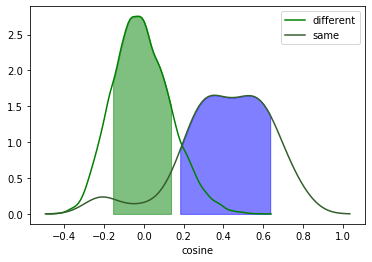

In [124]:
path = "project_stylometry_statistics/results/piperEN/delta/1000_delta_piperEN.h5"
prefix = "project_stylometry_statistics/results/piperEN/delta/"
corpus = 'piperEN'
def distplot(dist):
    ax = sns.distplot(dist['cosine'], hist=False, color='green')
    plt.savefig(mfw + '_' + corpus + '_delta_normaldist')
    plt.show()
    
import re
from scipy import stats


numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

        
        
for file in sorted(glob.glob(path), key=numericalSort):
    dist = pd.read_hdf(file)
    mfw = file.replace(prefix,'').split('_')[0]
    dist = dist[dist['cosine']!=1.00]

    #distplot(dist)
    #sns.set_palette("summer")
    sns.set_palette(sns.cubehelix_palette(14, start=1.85, rot=0, dark=0.3, light=.7, reverse=True))
#     ax = sns.distplot(dist['cosine'], hist=False, label=mfw)    #visualise all mfw steps

    #visualise same and different curve for one mfw step with quartile
    ax = sns.distplot(dist[dist['label']=='different']['cosine'], hist=False, label='different', color='g')
    kde = stats.gaussian_kde(dist[dist['label']=='different']['cosine'])
    shade = np.linspace(minus_diff, plus_diff, 300)
    plt.fill_between(shade, kde(shade), alpha=0.5, color='green')
    
    ax = sns.distplot(dist[dist['label']=='same']['cosine'], hist=False, label='same')
    kde = stats.gaussian_kde(dist[dist['label']=='same']['cosine'])
    shade = np.linspace(minus_same, plus_same, 300)
    plt.fill_between(shade, kde(shade), alpha=0.5, color='blue')
    
    
    plt.legend()
plt.savefig(corpus + '_delta_normaldist_quartile_MFW1000')

In [66]:
cutoff = pd.read_csv("project_stylometry_statistics/entire_best_cutoff.csv")

In [21]:
#vdelta = pd.DataFrame()
deltas = pd.read_hdf("project_stylometry_statistics/results/piperDE/delta/500_delta_piperDE.h5")
deltas.drop('manhattan', axis=1, inplace=True)
deltas.drop('euclidean', axis=1, inplace=True)
deltas.drop('label', axis=1, inplace=True)
deltas.drop('author', axis=1, inplace=True)
deltas['corpus']='piperDE'
vdelta=pd.concat([vdelta, deltas])
vdelta

,cosine,corpus
"BiShuMin,HuaGuanBingDu,seg.txt",1.00,Chinese
"BiShuMin,LanSeTianTang,seg.txt",0.51,Chinese
"YvQiuyv,ShuangLengChangHe,seg.txt",0.27,Chinese
"LongYingtai,ZheGeDongDangDeShiJie,seg.txt",0.20,Chinese
"YvQiuyv,XingZheWuJiang,seg.txt",0.24,Chinese
...,...,...
"Ehrmann,Marianne_Amalie.EinewahreGeschichteinBriefen_Novel.txt",-0.35,piperDE
"Fischer,CarolineAuguste_Margarethe_Novel.txt",-0.34,piperDE
"Reventlow,Franziska_VonPaulzuPedro_Novel.txt",-0.23,piperDE
"Fischer,CarolineAuguste_DieHonigmonathe_Novel.txt",-0.37,piperDE


In [35]:
vdelta.to_csv("delta_varianz_allekorpora")

In [41]:
vdelta = pd.read_csv("delta_varianz_allekorpora")
vdelta = vdelta[vdelta.cosine!=1.00]
vdelta

,Unnamed: 0,cosine,corpus
1,"BiShuMin,LanSeTianTang,seg.txt",0.51,Chinese
2,"YvQiuyv,ShuangLengChangHe,seg.txt",0.27,Chinese
3,"LongYingtai,ZheGeDongDangDeShiJie,seg.txt",0.20,Chinese
4,"YvQiuyv,XingZheWuJiang,seg.txt",0.24,Chinese
5,"YvQiuyv,WenHuaKuLv,seg.txt",0.13,Chinese
...,...,...,...
90296,"Ehrmann,Marianne_Amalie.EinewahreGeschichteinB...",-0.35,piperDE
90297,"Fischer,CarolineAuguste_Margarethe_Novel.txt",-0.34,piperDE
90298,"Reventlow,Franziska_VonPaulzuPedro_Novel.txt",-0.23,piperDE
90299,"Fischer,CarolineAuguste_DieHonigmonathe_Novel.txt",-0.37,piperDE


In [64]:
german = vdelta[vdelta['corpus']=='German']
chinese = vdelta[vdelta['corpus']=='Chinese']
french = vdelta[vdelta['corpus']=='French']
english = vdelta[vdelta['corpus']=='English']
piperDE = vdelta[vdelta['corpus']=='piperDE']
piperFR = vdelta[vdelta['corpus']=='pipierFR']
piperFR.corpus='piperFR'
piperEN = vdelta[vdelta['corpus']=='piperEN']
liste = [german, chinese, french, english, piperDE, piperEN, piperFR]

/home/teresa/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


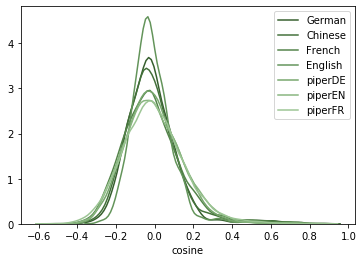

In [65]:
for language in liste:
    corp = np.unique(language['corpus'])[0]
    sns.set_palette(sns.cubehelix_palette(7, start=1.85, rot=0, dark=0.3, light=.7, reverse=True))
    ax = sns.distplot(language['cosine'], hist=False, label=corp)
    plt.legend()
plt.savefig('_delta_normaldist_best_cutoffs')

#### PCA

In [49]:
mfw = fre.iloc[:,:1000]
mfw

,die,und,ich,in,sein,du,eine,es,zu,mein,...,hinab,durchzittert,bitten,todte,weiten,allmutter,schnöde,brausend,zerfließen,graben
lyrik_lemma_l00180207.txt.txt,0.092593,0.009259,0.037037,0.009259,0.018519,0.018519,0.009259,0.000000,0.009259,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180012.txt.txt,0.115044,0.008850,0.097345,0.035398,0.035398,0.000000,0.008850,0.008850,0.026549,0.017699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180021.txt.txt,0.144828,0.041379,0.027586,0.055172,0.006897,0.000000,0.048276,0.000000,0.006897,0.006897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180093.txt.txt,0.114894,0.029787,0.010638,0.034043,0.019149,0.002128,0.014894,0.012766,0.012766,0.006383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180144.txt.txt,0.139535,0.046512,0.023256,0.000000,0.000000,0.000000,0.046512,0.023256,0.046512,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lyrik_lemma_l00180141.txt.txt,0.132007,0.034358,0.068716,0.014467,0.037975,0.025316,0.005425,0.014467,0.010850,0.003617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180138.txt.txt,0.119497,0.031447,0.037736,0.012579,0.031447,0.012579,0.012579,0.012579,0.006289,0.031447,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180190.txt.txt,0.135593,0.038136,0.027542,0.029661,0.027542,0.006356,0.031780,0.014831,0.006356,0.004237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lyrik_lemma_l00180126.txt.txt,0.065789,0.105263,0.006579,0.026316,0.013158,0.032895,0.000000,0.006579,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Prosa nur lemmatisierter Text

In [65]:
path = '../corpus/alles/*.txt'
prefix = '../corpus/alles/'
    
text_list = []
for file in glob.glob(path):
    filename = file.replace(prefix, '').replace('.txt', '')
    with open(file, 'r') as f:
        data = f.read().replace('\n', ' ')        
    text_list.append(pd.Series(data, name=filename))

prosa = pd.DataFrame(text_list)
prosa['mfw'] = '0'
prosa['sprechmarker'] = '0'
prosa['emotionen'] = '0'
prosa.head()

,0,mfw,sprechmarker,emotionen
lyrik_lemma_l00180207,tief tauchen in sonnengluthen ragen die berg h...,0,0,0
lyrik_lemma_l00180012,schon als ich noch eine knabe sein ziehen es...,0,0,0
lyrik_lemma_l00180021,zu+die ewig thron streben ihr empor so trotz...,0,0,0
lyrik_lemma_l00180093,es liegen die welt in sünde die heiligste se...,0,0,0
lyrik_lemma_l00180144,es rauschen zu+die seite ich die strom die k...,0,0,0


Prosa mit 1000 MFW, Sprechmarkern und Emotionen

In [66]:
for i, row in prosa.iterrows():
    string = ''
    for m in mfw.columns:
        if m in row[0]:
            string += m
            string += ' '
    row.mfw = string

In [68]:
sprechmarker = ['sagen', 'sprechen', 'fragen', 'antworten', 'schreien', 'jammern']

for i, row in prosa.iterrows():
    string = ''
    for m in sprechmarker:
        if m in row[0]:
            string += m
            string += ' '
    row.sprechmarker = string

In [69]:
emotion = ['liebreich','angst', 'ängstlich', 'trauer', 'traurig', 'zornig', 'zorn', 'verachtungsvoll', 'verachtung',
           'schuld', 'schuldig', 'liebe',  'geliebt', 'liebevoll', 'stolz', 'scham', 'schämen', 'überrasschung',
           'überrascht', 'sorge', 'sorgenvoll', 'ekel', 'ekeln', 'angeekelt', 'neid', 'neidisch', 'neidvoll',
           'glücklich', 'glück', 'freude', 'freudig', 'freuen', 'erleichterung', 'erleichtert', 'vergnügt', 'vergnügen',
           'zufrieden', 'zufriedenheit', 'verzweiflung', 'verzweifelt', 'verlegenheit', 'verlegen', 'aufregung',
           'aufgeregt', 'aufregen', 'spannung', 'gespannt', 'erregung', 'erregt', 'hoffen', 'hoffnung', 'befriedigt',
           'langweilig', 'langeweile', 'mitgefühl', 'mitfühlen', 'enttäuscht', 'enttäuschung', 'frust', 'frustriert',
           'eifersucht', 'eifersüchtig', 'wut', 'wütend', 'reue', 'schock', 'schockiert', 'zuneigung', 'verärgert',
           'verärgerung', 'erwartungsvoll', 'erwartung', 'vorfreude', 'scheu', 'gelassen', 'gelassenheit', 'mut',
           'mutig', 'neugierde', 'neugierig', 'depression', 'depressiv', 'niedergeschlagenheit', 'niedergeschlagen',
           'lustvoll', 'lust', 'rausch', 'einfühlend', 'einfühlsam', 'euphorisch', 'euphorie', 'dankbarkeit', 'dankbar',
           'hass', 'entsetzt', 'entsetzen', 'demütigung', 'demütig', 'demut', 'interesse', 'interessiert', 'einsamkeit',
           'einsam', 'empörung', 'empört', 'vertrauen', 'qualvoll', 'qual', 'gleichgültigkeit', 'gleichgültig',
           'fröhlichkeit', 'fröhlich', 'schadenfroh', 'schadenfreude', 'schmerz', 'melancholie', 'melancholisch',
           'panik', 'panisch']

for i, row in prosa.iterrows():
    string = ''
    for m in emotion:
        if m in row[0]:
            string += m
            string += ' '
    row.emotionen = string

In [70]:
prosa['genre'] = '0'
prosa['titel'] = '0'

for i, row in prosa.iterrows():
    row['genre'] = i.split("_")[0]
    row['titel'] = i.split("_")[:]
prosa = prosa.rename(columns={0: "text"})
prosa.head()

,text,mfw,sprechmarker,emotionen,genre,titel
lyrik_lemma_l00180207,tief tauchen in sonnengluthen ragen die berg h...,die und ich in sein du eine es zu von wie dein...,,mut,lyrik,"[lyrik, lemma, l00180207]"
lyrik_lemma_l00180012,schon als ich noch eine knabe sein ziehen es...,die und ich in sein du eine es zu mein er auf ...,,lust schmerz,lyrik,"[lyrik, lemma, l00180012]"
lyrik_lemma_l00180021,zu+die ewig thron streben ihr empor so trotz...,die und ich in sein du eine es zu mein sie wie...,fragen,stolz schmerz,lyrik,"[lyrik, lemma, l00180021]"
lyrik_lemma_l00180093,es liegen die welt in sünde die heiligste se...,die und ich in sein du eine es zu mein sie von...,sagen sprechen schreien,angst zorn liebe mut lust rausch qual,lyrik,"[lyrik, lemma, l00180093]"
lyrik_lemma_l00180144,es rauschen zu+die seite ich die strom die k...,die und ich in du eine es zu wie er an so o al...,,rausch,lyrik,"[lyrik, lemma, l00180144]"


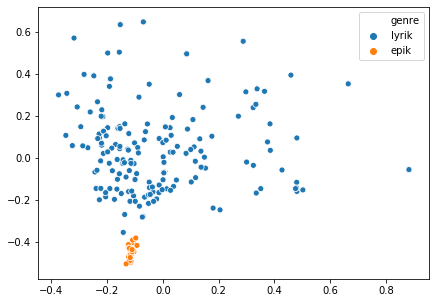

In [88]:
x = TfidfVectorizer().fit_transform(prosa.emotionen)
X = TruncatedSVD(n_components=50, random_state=0).fit_transform(x)
pca = PCA(n_components=2)
X_tf = pca.fit_transform(X)
plt.figure(figsize=(7,5))
sns.scatterplot(X_tf[:, 0], X_tf[:, 1],hue=prosa.genre, marker="o")

plt.savefig('../results/PCA_emotionen_genres.png', bbox_inches = "tight")

In [89]:
for i,row in prosa.iterrows():
    c = Counter(row.text.split())
    prosa.at[i, 'number_of_tokens'] = sum(c.values())
    prosa.at[i, 'number_of_types'] = int(len(c))
prosa

,text,mfw,sprechmarker,emotionen,genre,titel,number_of_tokens,number_of_types
lyrik_lemma_l00180207,tief tauchen in sonnengluthen ragen die berg h...,die und ich in sein du eine es zu von wie dein...,,mut,lyrik,"[lyrik, lemma, l00180207]",105.0,83.0
lyrik_lemma_l00180012,schon als ich noch eine knabe sein ziehen es...,die und ich in sein du eine es zu mein er auf ...,,lust schmerz,lyrik,"[lyrik, lemma, l00180012]",115.0,76.0
lyrik_lemma_l00180021,zu+die ewig thron streben ihr empor so trotz...,die und ich in sein du eine es zu mein sie wie...,fragen,stolz schmerz,lyrik,"[lyrik, lemma, l00180021]",142.0,89.0
lyrik_lemma_l00180093,es liegen die welt in sünde die heiligste se...,die und ich in sein du eine es zu mein sie von...,sagen sprechen schreien,angst zorn liebe mut lust rausch qual,lyrik,"[lyrik, lemma, l00180093]",453.0,259.0
lyrik_lemma_l00180144,es rauschen zu+die seite ich die strom die k...,die und ich in du eine es zu wie er an so o al...,,rausch,lyrik,"[lyrik, lemma, l00180144]",40.0,33.0
...,...,...,...,...,...,...,...,...
lyrik_lemma_l00180141,wer sein du mondesleuchtender die tod die ...,die und ich in sein du eine es zu mein sie von...,sagen fragen,liebe ekel ekeln reue lust schmerz,lyrik,"[lyrik, lemma, l00180141]",547.0,263.0
lyrik_lemma_l00180138,nun sein die abend kommen die stern sein ent...,die und ich in sein du eine es zu mein sie von...,,liebe sorge glück freude einsamkeit einsam,lyrik,"[lyrik, lemma, l00180138]",159.0,101.0
lyrik_lemma_l00180190,""" wer heim...",die und ich in sein du eine es zu mein sie von...,sagen schreien,reue scheu qual,lyrik,"[lyrik, lemma, l00180190]",465.0,207.0
lyrik_lemma_l00180126,wir haben ich wieder erstreiten in wetternder ...,die und ich in sein du eine es sie von wie dei...,sprechen,stolz rausch,lyrik,"[lyrik, lemma, l00180126]",148.0,104.0


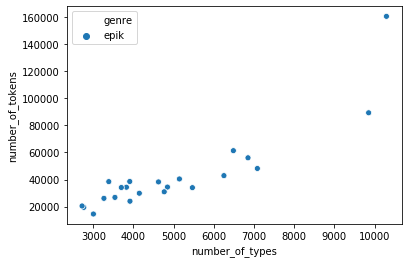

In [97]:
# plt.figure(figsize=(12,8))
sns.scatterplot(x='number_of_types', y='number_of_tokens',hue='genre', data=prosa[prosa.genre=='epik'])
plt.savefig('../results/type_token_ratio_epik')